In [1]:
import csv
import sklearn
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [4]:
symptoms_dataset = pd.read_csv('Example/Inputs/example_dataset_1.csv')

Subset to symptoms we are interested in

In [5]:
symptom_list = [
    'A',
    'B',
    'C',
    'D',
    'E',
    'F',
    'G',
    'H',
    'I',
    'J'
]

symptoms = symptoms_dataset[symptom_list]

# UMAP

Transpose the data, and replace strings with boolean values

In [6]:
symptoms_t = symptoms.transpose()

In [7]:
symptoms_t.replace({
    1: True,
    0: False
}, inplace = True)

Define the convenience function for fitting a umap and drawing the outputs. We use this when deciding on the hyperparameters.

In [8]:
def draw_umap(
    n_neighbours: int = 5,
    min_dist: float = 0.1,
    n_components: int = 2,
    metric: str = 'jaccard',
    title='',
    random_state = None
    ):
    
    reducer = umap.UMAP(
        n_neighbors = n_neighbours,
        metric = metric,
        min_dist = min_dist,
        n_components = n_components,
        random_state = random_state
    )
    
    embedding_t = reducer.fit_transform(symptoms_t)
    
    embedding = embedding_t.transpose()
    
    fig = plt.figure()
    
    if n_components == 1:
        
        ax = fig.add_subplot(111)
        ax.scatter(embedding[0], range(len(embedding[0])), alpha = 0.5)
        
        for i, txt in enumerate(symptom_list):
            ax.annotate(txt, (embedding[0][i], i))
            
    if n_components == 2:
        
        ax = fig.add_subplot(111)
        
        ax.scatter(embedding[0], embedding[1], alpha = 0.5)

        for i, txt in enumerate(symptom_list):
            ax.annotate(txt, (embedding[0][i], embedding[1][i]))
            
    if n_components == 3:
        
        ax = fig.add_subplot(111, projection = '3d')
        
        ax.scatter(embedding[0], embedding[1], embedding[2], alpha = 0.5, s = 100)
        
    plt.title(title)

C:\Users\mfyles\Anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
C:\Users\mfyles\Anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
C:\Users\mfyles\Anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
C:\Users\mfyles\Anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
C:\Users\mfyles\Anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
C:\Users\mfyles\Anaconda3\lib\site-

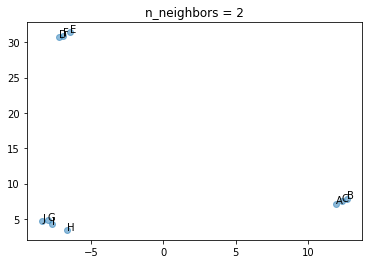

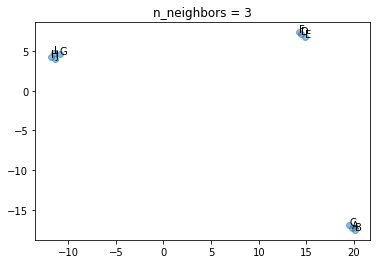

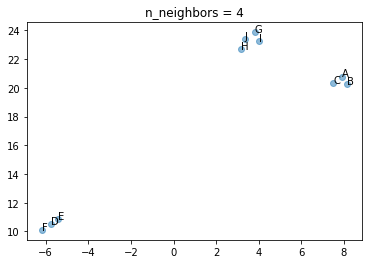

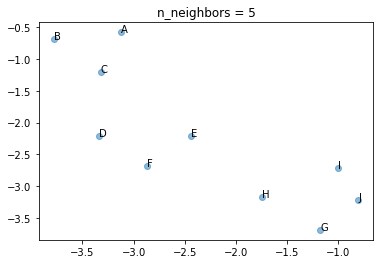

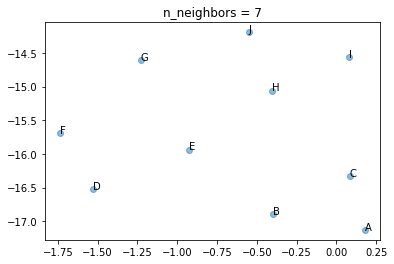

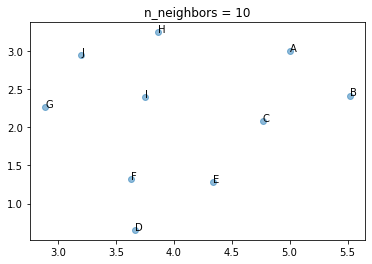

In [9]:
for n in [2, 3, 4, 5, 7, 10]:
    draw_umap(n_neighbours = n, title =f'n_neighbors = {n}', random_state = 111)

C:\Users\mfyles\Anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
C:\Users\mfyles\Anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
C:\Users\mfyles\Anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
C:\Users\mfyles\Anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


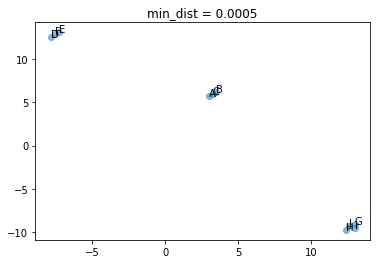

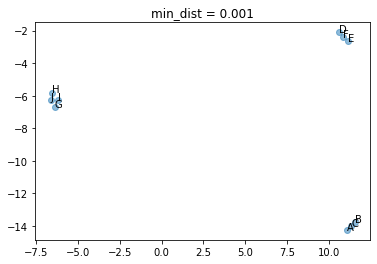

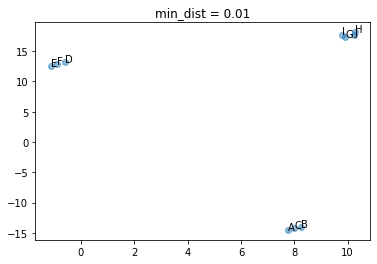

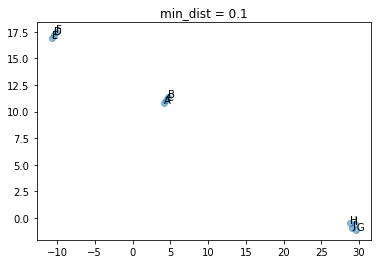

In [10]:
for d in [0.0005, 0.001, 0.01, 0.1]:
    draw_umap(min_dist = d, n_neighbours = 3, title = f'min_dist = {d}', random_state = 112)

C:\Users\mfyles\Anaconda3\envs\CovidSymptomsAnalysis\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


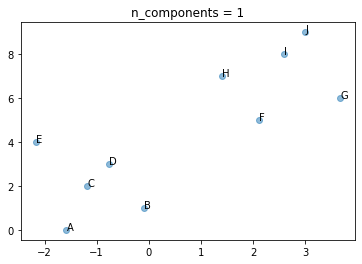

In [10]:
draw_umap(n_components = 1, title = 'n_components = 1')

C:\Users\mfyles\Anaconda3\envs\CovidSymptomsAnalysis\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


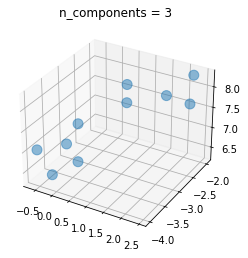

In [11]:
draw_umap(min_dist = 0.1, n_neighbours = 5, n_components = 3, title = 'n_components = 3')

## Loose clustering
Typically with higher values of n_neighbours will lead to better capturing of the global structure. The distance between clusters will be interpretable.

C:\Users\mfyles\Anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


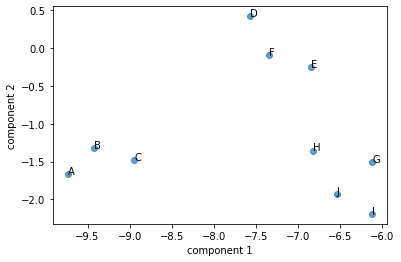

In [13]:
reducer = umap.UMAP(
    n_neighbors = 5,
    metric = 'jaccard',
    min_dist = 0.001,
    n_components = 2,
    random_state = 113
)

embedding_t = reducer.fit_transform(symptoms_t)

embedding = embedding_t.transpose()

fig, ax = plt.subplots()

ax.scatter(embedding[0], embedding[1], alpha = 0.7)

ax.set_xlabel(f'component 1')
ax.set_ylabel(f'component 2')

for i, txt in enumerate(symptom_list):
    ax.annotate(txt, (embedding[0][i], embedding[1][i]))

In [14]:
embedding_df = pd.DataFrame(embedding, columns = symptom_list)

In [16]:
embedding_df.to_csv('Example/Outputs/SymptomsUMAP_loose_clustering.csv')

## Tight clustering
Typically with lower n_neighbours, and producing well seperated clusters.

C:\Users\mfyles\Anaconda3\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


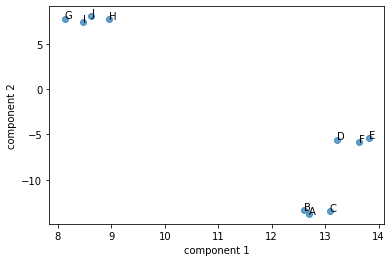

In [17]:
reducer = umap.UMAP(
    n_neighbors = 4,
    metric = 'jaccard',
    min_dist = 0.001,
    n_components = 2,
    random_state = 112
)

embedding_t = reducer.fit_transform(symptoms_t)

embedding = embedding_t.transpose()

fig, ax = plt.subplots()

ax.scatter(embedding[0], embedding[1], alpha = 0.7)

ax.set_xlabel(f'component 1')
ax.set_ylabel(f'component 2')

for i, txt in enumerate(symptom_list):
    ax.annotate(txt, (embedding[0][i], embedding[1][i]))

In [18]:
embedding_df = pd.DataFrame(embedding, columns = symptom_list)

In [19]:
embedding_df.to_csv('Example/Outputs/SymptomsUMAP_tight_clustering.csv')